<h1><center>Notebook</center></h1>

## 7CCFM06 Coursework

<h2><center>Setup</center></h2>

The following cells in this section of the notebook contain the nessessary Classes and Functions needed to complete Questions 1, 2, 3 and 4 in the attched problem sheet. Each Class and Function will have a coresponding test function which aim to flag up any anomolies that may occur due to incorrect code.

## Import Libarys

### Libarys
1. scipy Libary
2. numpy Libary 
3. matplotlib.pyplot Libary
4. seaborn Libary
5. warnings Libary

In [3]:
### Import Libarys ###

## libarys ##
import scipy as sp
import scipy.stats as stats
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Random Seed

In [4]:
### random seed

## set random seed (# to remove random seed)
np.random.seed(2211)

## Market Model

### Classes & Functions
1. market_model() - This Class defines the market parameters of our experiment. That is the risk free rate $r$, inital stock price $S_0$, dirft of the stock $\mu$ and the volatility function $\sigma(t)$. The class also has embeded functions that compute the mean and variance of the log returns of a stock i.e. $\mathbb{E}(\log{\frac{S_t}{S_s}})$ and $\text{var}(\log{\frac{S_t}{S_s}})$ as well as Black-Scholes Implied volaility squared $s_t^2$ of GBM with time dependent volatility.
1. sigma(self, t) - This is an embeded function in the Calss market_model() that outputs the GBM volatility of the stock at time $t$
1. mean(self, s, t) - This is an embeded function in the Class market_model() that outputs the mean of the log returns i.e. $\mathbb{E}[\log{(\frac{S_t}{S_s})}]$
1. var(self, s ,t) - This is an embeded function in the Class market_model() that outputs the variance of the log returns of $\text{var}[\log{(\frac{S_t}{S_s})}]$
1. s2(self, t) - This is an embeded function in the Class markret_model() that outputs the Black-Scholes implied volaility squared $s_t^2$ of GBM with time dependent volatility.

In [5]:
### Market Model ###

## The Market Model
class market_model():
    
    # fixed market parameters
    S0 = 105
    mu = 0.12
    r = 0.04
    
    # max time maturity
    T_max = 1.60
    
    ## market volaitlity
    # t: (float) input time
    def sigma(self, t):
        
        if t > 0.5:
            return 0.13 + 0.13 * ((t-0.5) / (self.T_max - 0.5))
        else:
            return 0.13
    
    ## mean of log returns
    # s, t (float) input time interval such that s < t
    def mean(self, s, t):

        # initalize variables
        nu = self.mu
        T_max = self.T_max

        # integral of f(t) = mean of log returns between the time interval of the intergal 
        # define f(x) depending on integral bounds
        def f1(x):
            return nu - 0.5 * (0.13 + 0.13 * ((x - 0.5) / (T_max - 0.5)))**2
        def f2(x):
            return nu - 0.5 * (0.13**2)

        # mean value if t > 0.5 and s >= 0.5
        if t > 0.5 and s >= 0.5:             
            return integrate.quad(f1, s, t)[0]
            
        # mean value if t > 0.5 and s < 0.5
        if t > 0.5 and s < 0.5:           
            return integrate.quad(f1, 0.5, t)[0] + integrate.quad(f2, s, 0.5)[0]
        
        # mean value if t <= 0.5 and s < 0.5
        if t <= 0.5 and s < 0.5:
            return integrate.quad(f2, s, t)[0]

    ## variance of log returns
    # s, t (float) input time interval such that s < t
    def var(self, s ,t):

        # initalize variables
        T_max = self.T_max
        
        ## integral of g(x) = variance of log returns between the time interval of the integral 
        # define g(x) depending on integral bounds
        def g1(x):
            return (0.13 + 0.13 * ((x-0.5) / (T_max - 0.5)))**2
        def g2(x):
            return 0.13**2
    
        # var value if t > 0.5 and s >= 0.5
        if t > 0.5 and s >= 0.5:             
            return integrate.quad(g1, s, t)[0]
            
        # var value if t > 0.5 and s < 0.5
        if t > 0.5 and s < 0.5:           
            return integrate.quad(g1, 0.5, t)[0] + integrate.quad(g2, s, 0.5)[0]
        
        # var value if t <= 0.5 and s < 0.5
        if t <= 0.5 and s < 0.5:
            return integrate.quad(g2, s, t)[0]
    
    ## s(t)^2
    # t (float) input time
    def s2(self, t):

        # initalize variables
        T_max = self.T_max 

        # initalize functions
        variance = self.var

        return (1/(T_max - t)) * variance(t, T_max)


### Tests
1. test_market_model() - This test double checks variables pre-defined in the Class and checks that the functions sigma(), mean(), var(), s2() output the correct values comparing the output to externaly varified values.

In [6]:
### Market model (testing) ###

## test market_model()
def test_market_model():

    # test market paramaters
    assert market_model().r == 0.04, "incorrect risk-free rate"
    assert market_model().mu == 0.12, "incorrect drift"
    assert market_model().T_max == 1.60, "incorrect max time frame"
    assert market_model().S0 == 105, "incorrect inital stock price"

    # test sigma()
    assert market_model().sigma(0.4) == 0.13, "error, sigma for t <= 0.5"
    assert round(market_model().sigma(0.8), 3) == 0.165, "error, sigma for t > 0.5"

    # test mean()
    assert round(market_model().mean(0.1, 0.3), 3) == 0.022, "error, mean for s, t < 0.5"
    assert round(market_model().mean(0.4, 0.7), 3) == 0.011 + 0.022, "error, mean for s < 0.5 and t >= 0.5"
    assert round(market_model().mean(1, 1.3), 3) == 0.030, "error, mean for s, t >= 0.5"

    # test var()
    assert round(market_model().var(0.3, 0.4), 4) == 0.0017, "error, variance for s, t < 0.5"
    assert round(market_model().var(0.2, 0.6), 4) == 0.0051 + 0.0018, "error, variance for s < 0.5 and t >= 0.5"
    assert round(market_model().var(0.7, 0.9), 4) == 0.0055, "error, variance for s, t >= 0.5"

    # test s2() 
    assert round(market_model().s2(0.2), 4) == 0.0346, "error, s2 for t < 0.5"
    assert round(market_model().s2(0.5), 4) == 0.0394, "error, s2 for t = 0.5"
    assert round(market_model().s2(1.5), 4) == 0.0646, "error, s2 for t > 0.5"

    # return 
    return print("Test Passed :)")

# run test 
test_market_model()

Test Passed :)


## Option Models

### Classes & Functions
1. option() - This Class defines a call option with strike price 139 and maturity 1.6 along with its payoff function
2. option_H() - This Class defines a put option with strike price 105 and maturity 1.6 along with its payoff function

In [7]:
### Options ###
    
# Put Option with strike 139
class option():
    
    # option parameters 
    T = 1.60
    K = 139

    ## call option payoff
    # ST: (float - vector/variable) input stock price at maturity
    def payoff_call(self, ST):
        
        # return payoff with stike 139 
        return np.maximum(ST - self.K, 0)
    
    ## put option payoff
    # ST: (float - vector/variable) input stock price at maturity
    def payoff_put(self, ST):
        
        # return payoff with strike 139
        return np.maximum(self.K - ST, 0)

# Option with strike S0    
class option_H():
    
    # option parameters 
    T = 1.60
    K = 105
    
    ## call option payoff
    # ST: (float - vector/variable) input stock price at maturity
    def payoff_call(self, ST):
        
        # return payoff with stike S0
        return np.maximum(ST - self.K, 0)
    
    ## put option payoff
    # ST: (float - vector/variable) input stock price at maturity
    def payoff_put(self, ST):

        # return payoff with strike S0
        return np.maximum(self.K - ST, 0)

### Tests
1. test_option() - This test checks that the pre defined variables are set to the correct values as well as checking that the payoff functions defined in the class output the correct values for inputs above and below the strike price $K=139$
2. test_option_H() - This test checks that the pre defined variables are set to the correct values as well as checking that the payoff functions defined in the class output the correct values for inputs above and below the strike price $K=105$

In [8]:
### Options (testing) ###

## test option()
def test_option():

    # test paramaters
    assert option().T == 1.6, "incorrect option maturity"
    assert option().K == 139, "incorrect option strike price"

    # test payoff functions
    assert option().payoff_call(178) == 178-139, "error, call option payoff"
    assert option().payoff_call(74) == 0, "error, call option payoff"
    assert option().payoff_put(152) == 0, "error, put option payoff"
    assert option().payoff_put(84) == 139-84, "error, put option payoff"

    # return
    return print("Test Passed :)")

# run test
test_option()

## test option_H()
def test_option_H():

    # test paramaters
    assert option_H().T == 1.6, "incorrect option_H maturity"
    assert option_H().K == 105, "incorrect option_H strike price"

    # test payoff functions
    assert option_H().payoff_call(149) == 149-105, "error, call option_H payoff"
    assert option_H().payoff_call(96) == 0, "error, call option_H payoff"
    assert option_H().payoff_put(200) == 0, "error, put option_H payoff"
    assert option_H().payoff_put(60) == 105-60, "error, put option_H payoff"

    # return 
    return print("Test Passed :)")

# run test
test_option_H()

Test Passed :)
Test Passed :)


## Simulating Geometric Brownian Motion

### Functions
1. simulate_GBM(model, method, N , n, vol) - This function simualtes a stocks price path on a discrete time grid for $n+1$ time steps for $N$ simulations (price paths). This function uses either the "eplicit" or "euler" method to simulate multiple stock price processes and takes into account both "fixed" (constant) or "variable" (time dependent) volaitlity for the GBM of the stock. The spesifics of the GBM  of the stock come from the class market_model(). The output of the function is a $[N, n+1]$ matrix with the rows representing different stock price paths and columns the price of a stock for a given time step.

In [9]:
### Geometric Brownian Motion ###

## simulate Geormetric Brownian Motion for [ dSt = mu*St*dt + sigma(t)*St*dWt ] 
# model: (class) input market model name followed by ()
# method: (string) input "explicit" for simulation using the explicit solution of the ODE or "euler" for simulation using euler maruyama scheme
# N: (int) input the number of simulations of GBM performed
# n: (int) input the number of time steps performed
def simulate_GBM(model, method, N , n, vol):

    # initalise variables
    S0 = model.S0
    mu = model.mu
    T = model.T_max

    # find delta t and times
    dt = T/n

    # create empty matrix
    S = np.zeros([N, n+1])

    # set inital prices
    S[:,0] = S0
    
    # simulate using the explicit solution of the SDE
    if method == "explicit":
        
        for i in range(0, n):

            # simulating GBM with a time dependent volaitlity sigma(t)
            if vol == "variable":
                mean = model.mean(i*dt, (i+1)*dt)
                var = model.var(i*dt, (i+1)*dt)
                sd = np.sqrt(var)
                epsilon_alt = np.random.normal(mean, sd, N)
                S[:,i+1] = S[:, i]*np.exp(epsilon_alt)

            # simulating GBM with a time dependent volaitlity sigma(T)
            if vol == ("fixed"):
                epsilon = np.random.normal(0, 1, N)
                S[:,i+1] = S[:, i]*np.exp((mu - 0.5*model.sigma(T)**2)*dt + model.sigma(T)*np.sqrt(dt)*epsilon)
        
        return S
    
    # simulate using the euler maruyama scheme 
    if method == "euler":

        for i in range(0, n):
            
            # simulating GBM with a time dependent volaitlity sigma(t)
            if vol == "variable":
                epsilon = np.random.normal(0, 1, N)
                S[:,i+1] = S[:, i]*(1 + mu*dt + model.sigma(i*dt)*np.sqrt(dt)*epsilon)

            # simulating GBM with a time dependent volaitlity sigma(T)
            if vol == "fixed":
                epsilon = np.random.normal(0, 1, N)
                S[:,i+1] = S[:, i]*(1 + mu*dt + model.sigma(T)*np.sqrt(dt)*epsilon)
        
        return S

### Tests
1. test_simulate_GBM() - This test takes advantage of the fact that the log returns of the GBM stock proccess should be normaly distirbuted with known mean and variance. The takes the ouput of the function simulate_GBM() and conputs the log difference of two consecuative rows, then checks its mean, variance and normality. The mean and variance can be externaly calculated and checked through means of comparison, as for the normality this is checked though the use of shapiro normality test.

In [10]:
### Geometric Brownian Motion (Testing) ###

## test simulate_GBM()
def test_simulate_GBM():

    # set dt
    dt = 1.6/10

    # fixed volatility

    # create a sample of the mean and variance of a sample of log returns between a time interval (fixed volatility)
    sample_mean = []
    sample_var = []
    for i in range(5000):
        S = simulate_GBM(market_model(), "explicit", 10, 10, "fixed") 
        log_return = np.log(S[:, 9]) - np.log(S[:,8])  
        sample_mean.append(np.mean(log_return))
        sample_var.append(np.var(log_return))

    # test mean of sample mean (fixed volatility)
    assert round(np.mean(sample_mean), 2) == round((0.12 - 0.5*(0.26**2))*dt, 2), "incorrect mean of log returns (fixed)" 

    # test mean of sample variance (fixed volatility)
    assert round(np.mean(sample_var), 2) == round((0.26**2)*dt, 2), "incorrect variance of log returns (fixed)" 

    # Create a sample of log returns (fixed volatility)
    S = simulate_GBM(market_model(), "explicit", 1000, 10, "fixed") 
    log_return = np.log(S[:, 5]) - np.log(S[:,4])  

    # test normaility of log returns (fixed volatility)
    assert stats.shapiro(log_return).pvalue > 0.05, "error, log returns not normal (fixed)" 

    # variable volatility

    # create a sample of the mean and variance of a sample of log returns between a time interval (variable volatility)
    sample_mean = []
    sample_var = []
    for i in range(5000):
        S = simulate_GBM(market_model(), "explicit", 10, 10, "variable") 
        log_return = np.log(S[:, 3]) - np.log(S[:,2])  
        sample_mean.append(np.mean(log_return))
        sample_var.append(np.var(log_return))


    # test mean of sample mean (variable volatility)
    assert round(np.mean(sample_mean), 2) == round(market_model().mean(2*dt, 3*dt), 2), "incorrect sample means for log returns (variable)" 

    # test mean of sample variance ((variable volatility)
    assert round(np.mean(sample_var), 2) == round(market_model().var(2*dt, 3*dt), 2), "incorrect sample means for log returns (variable)" 

    # Create a sample of log returns (variable volatility)
    S = simulate_GBM(market_model(), "explicit", 1000, 10, "variable") 
    log_return = np.log(S[:, 3]) - np.log(S[:,2])  

    # test normaility of log returns (variable volatility)
    assert stats.shapiro(log_return).pvalue > 0.05, "error, log returns not normal (fixed)" 

    # return
    return print("Test Passed :)")

# run test
test_simulate_GBM()

Test Passed :)


## Black-Scholes

### Functions
1. N(z) - This function outputs the CDF value of a standard normal distirbution
1. n(z) - This function outputs the PDF value of a standard normal distirbution
1. compute_d1_d2(model, option, St, t, vol) - This function out puts the d1 and d2 values of the Black-Scholes equation using the inputs $(S_t, K, r, \sigma, \tau)$
1. BS_call(model, option, St, t, vol) - This function outputs the Black-Scholes value for a call option using inputs $(S_t, K, r, \sigma, \tau)$
1. BS_put(model, option, St, t, vol) - This function outputs the Black-Scholes value for a Put option using inputs $(S_t, K, r, \sigma, \tau)$
1. BS_delta(model, option, St, t, vol, CorP) - This function outputs the delta of an option (Put or Call) using the Black-Schoels equation and has inputs This function outputs the Black-Scholes value for a call option using inputs $(S_t, K, r, \sigma, \tau, \text{CorP})$
1. BS_gamma(model, option, St, t, vol, CorP) - This function outputs the gamma of an option (Put or Call) using the Black-Schoels equation and has inputs This function outputs the Black-Scholes value for a call option using inputs $(S_t, K, r, \sigma, \tau, \text{CorP})$

In [11]:
### Black-Scholes ###
    
## standard normal cdf
# z: (float) input x such that P(Z<z) = N(z) where Z ~ N(0, 1) 
def N(z):
    return sp.stats.norm.cdf(z)

## standard normal pdf
# z: (float) input x such that P(Z<z) = N(z) where Z ~ N(0, 1) 
def n(z):
        return sp.stats.norm.pdf(z)
    
## d1 and d2 values for black-scholes equation
# model: (class) input market model name followed by ()
# options: (class) input option model name followed by ()
# st: (float - vector/variable) input stocks price at time t
# t: (float - vector/varible) input time
# vol: (string) input "fixed" for sigma(T) volatility model or "variable" for sigma(t) volatility model or "s2" for s(t) volatility model
def compute_d1_d2(model, option, St, t, vol):

    # initalize variables
    r = model.r
    K = option.K
    T = option.T
    tau = T - t

    # initalizie sigma
    if vol == "fixed":
        sigma2 = model.sigma(T)**2
    if vol == "variable":
        sigma2 = model.sigma(t)**2
    if vol == "s2":
        sigma2 = model.s2(t)

    # compute d1 and d2
    d1 = (np.log(St/K) + (r + 0.5*sigma2)*tau) * (1 / np.sqrt(sigma2 * tau))
    d2 = d1 - np.sqrt(sigma2 * tau)
 
    return d1, d2

## black-scholes call option price
# model: (class) input market model name followed by ()
# options: (class) input option model name followed by ()
# st: (float - vector/variable) input stocks price at time t
# t: (float - vector/varible) input time
# vol: (string) input "fixed" for sigma(T) volatility model or "variable" for sigma(t) volatility model or "s2" for s(t) volatility model
def BS_call(model, option, St, t, vol):

    # initalize variables
    d1, d2 = compute_d1_d2(model, option, St, t, vol)
    r = model.r
    K = option.K
    T = option.T
    tau = T - t
    
    return N(d1) * St - N(d2)*K*np.exp(-r*tau)
    
## black-scholes put option price
# model: (class) inpurt market model name followed by ()
# options: (class) input option model name followed by ()
# st: (float - vector/variable) stocks price at time t
# t: (float -vector/variable) time
# vol: (string) input "fixed" for sigma(T) volatility model or "variable" for sigma(t) volatility model or "s2" for s(t) volatility model
def BS_put(model, option, St, t, vol):

    # initalize variables
    d1, d2 = compute_d1_d2(model, option, St, t, vol)
    r = model.r
    K = option.K
    T = option.T
    tau = T - t

    return N(-d2)*K*np.exp(-r*tau) - N(-d1) * St


## black-scholes delta value
# model: (class) inpurt market model name followed by ()
# options: (class) input option model name followed by ()
# st: (float - vector/variable) stocks price at time t
# t: (float -vector/variable) time
# vol: (string) input "fixed" for sigma(T) volatility model or "variable" for sigma(t) volatility model or "s2" for s(t) volatility model
# CorP: (string) input "C" for call option and "P" for put option
def BS_delta(model, option, St, t, vol, CorP):

    if CorP == "C":
        return N(compute_d1_d2(model, option, St, t, vol)[0])
    
    if CorP == "P":
        return N(-compute_d1_d2(model, option, St, t, vol)[0])
    
## black-scholes gamma value
# model: (class) inpurt market model name followed by ()
# options: (class) input option model name followed by ()
# st: (float - vector/variable) stocks price at time t
# t: (float -vector/variable) time
# vol: (string) input "fixed" for sigma(T) volatility model or "variable" for sigma(t) volatility model or "s2" for s(t) volatility model
# CorP: (string) input "C" for call option and "P" for put option
def BS_gamma(model, option, St, t, vol, CorP):

    # initalize variables
    T = option.T
    tau = T - t

    # initalizie sigma
    if vol == "fixed":
        sigma2 = model.sigma(T)**2
    if vol == "variable":
        sigma2 = model.sigma(t)**2
    if vol == "s2":
        sigma2 = model.s2(t)

    if CorP == "C":
        return n(compute_d1_d2(model, option, St, t, vol)[0])/(St*np.sqrt(sigma2*tau))
    
    if CorP == "P":
        return n(compute_d1_d2(model, option, St, t, vol)[0])/(St*np.sqrt(sigma2*tau))

### Tests
1. test_N() - This test checks the output of the standard normal CDF with pre-determated values
1. test_n() - This test checks the ouput of the standard normal PDF with pre-determated values
1. test_compute_d1_d2() - This test checks d1 and d2 values with externaly calculated values
1. test_BS_call() - This test checks black-scholes call option values with externaly calculated values for fixed (constant) and variable (time dependent) implied volaitlities 
1. test_BS_put() - This test checks black-scholes put options with externaly calculated values for fixed (constant) and variable (time dependent) implied volaitlities 
1. test_BS_delta() - This test check black-scholes delta values with externaly calculated values of put and call options with fixed (constant) and variable (time dependent) implied volaitlities 
1. test_BS_gamma() - This test check black-scholes gamma values with externaly calculated values of put and call options with fixed (constant) and variable (time dependent) implied volaitlities 

In [12]:
### Black-Scholes (Testing) ###

# test N()
def test_N():

    # test Standard Normal CDF values
    assert N(0) == 0.5, "incorrect normal CDF value"
    assert round(N(2), 3) == 0.977, "incorrect normal CDF value"

    # return
    return print("Test Passed :)")

# run test
test_N()
    
# test n()
def test_n():

    # test Standard Normal PDF values
    assert round(n(0), 3) == 0.399, "incorrect normal PDF value"
    assert round(n(-2), 3) == 0.054, "incorrect normal PDF value"

    #return
    return print("Test Passed :)")

# run test
test_n()
    
# test  compute_d1_d2()
def test_compute_d1_d2():

    # compute d1 and d2 values
    fd1, fd2 = compute_d1_d2(market_model(), option(), 135, 1.5, "fixed")
    vd1, vd2 = compute_d1_d2(market_model(), option_H(), 93, 0.9, "s2")

    # test d1 values 
    assert round(fd1, 3) == -0.265, "incorrect d1 value (fixed)"
    assert round(vd1, 3) == -0.415, "incorrect d1 value (variable)"

    
    # test d2 values
    assert round(fd2, 3) == -0.348, "incorrect d2 value (fixed)"
    assert round(vd2, 3) == -0.599, "incorrect d2 value (variable)"

    # return
    return print("Test Passed :)")

# run test 
test_compute_d1_d2()

# test BS_call
def test_BS_call():

    # test BS_call values
    assert round(BS_call(market_model(), option(), 302, 1.4, "s2"), 3) == 164.108, "incorrect BS call option value (variable)"
    assert round(BS_call(market_model(), option_H(), 64, 0.3, "fixed"), 3) == 0.697, "incorrect BS call option value (fixed)"

    # return
    return print("Test Passed :)")

# run test 
test_BS_call()

# test BS_put
def test_BS_put():

    # test BS_put values
    assert round(BS_put(market_model(), option_H(), 267, 0.5, "s2"), 3) == 0.000, "incorrect BS put option value (variable)"
    assert round(BS_put(market_model(), option(), 59, 1.1, "fixed"), 3) == 77.248, "incorrect BS put option value (fixed)"

    # return 
    return print("Test Passed :)")

# run test 
test_BS_put()

# test BS_delta
def test_BS_delta():

    # test BS_delta for call options
    assert round(BS_delta(market_model(), option(), 179, 1.3, "fixed", "C"), 3) == 0.973, "incorrect BS delta value for call option (fixed)"
    assert round(BS_delta(market_model(), option_H(), 73, 0.2, "s2", "C"), 3) == 0.099, "incorrect BS delta value for call option (fixed)"

    # test BS_delta for call options
    assert round(BS_delta(market_model(), option_H(), 221, 0.8, "fixed", "P"), 3) == 0.00, "incorrect BS delta value for call option (fixed)"
    assert round(BS_delta(market_model(), option(), 140, 0.9, "s2", "P"), 3) == 0.389, "incorrect BS delta value for call option (fixed)"

    # return 
    return print("Test Passed :)")

# run test
test_BS_delta()

# test BS_gamma
def test_BS_gamma():

    # test BS_delta for call options
    assert round(BS_gamma(market_model(), option(), 170, 0.5, "fixed", "C"), 3) == 0.005, "incorrect BS delta value for call option (fixed)"
    assert round(BS_gamma(market_model(), option_H(), 130, 0.2, "s2", "C"), 3) == 0.006, "incorrect BS delta value for call option (fixed)"

    # test BS_delta for call options
    assert round(BS_gamma(market_model(), option(), 110, 0.1, "fixed", "P"), 3) == 0.011, "incorrect BS delta value for call option (fixed)"
    assert round(BS_gamma(market_model(), option_H(), 90, 0.3, "s2", "P"), 3) == 0.019, "incorrect BS delta value for call option (fixed)"

    # return 
    return print("Test Passed :)")

# run tests
test_BS_gamma()

Test Passed :)
Test Passed :)
Test Passed :)
Test Passed :)
Test Passed :)
Test Passed :)
Test Passed :)


## Simulating Hedging Strategies

### Functions
1. simulate_delta_headging(model, option, N, n, GBM_vol, BS_vol, method, CorP)
2. half_simulate_gamma_delta_headging(model, option, option_H, N, n, GBM_vol, BS_vol, method, CorP)

In [13]:
### Heaging ### 

## Delta Headging
# model: (class) inpurt market model name followed by ()
# options: (class) input option model name followed by ()
# N: (int) input the number of simulations of GBM performed
# n: (int) input the number of time steps performed
# GMB_vol: (string) input "fixed" for sigma(T) volatility model or "variable" for sigma(t) volatility model or "s2" for s(t) volatility model
# BS_vol: (string) input "fixed" for sigma(T) volatility model or "variable" or sigma(t) volatility model
# method: (string) input "explicit" for simulation using the explicit solution of the ODE or "euler" for simulation using euler maruyama scheme
# CorP: (string) input "C" or "P" for call or put option respectively 
def simulate_delta_headging(model, option, N, n, GBM_vol, BS_vol, method, CorP):

    # Simulate stock prices
    S = simulate_GBM(model, method, N , n, GBM_vol)
    S_0 = model.S0
    
    # BS option price at time 0
    if CorP == "C":
        V_0 = BS_call(model, option, S_0, 0, BS_vol)

    if CorP == "P":
        V_0 = BS_put(model, option, S_0, 0, BS_vol)

    # initalize variables
    dt = model.T_max/n
    r = model.r
    Pi = np.zeros([N, n+1])
    B = np.zeros([N, n+1]) 
    q = np.zeros([N, n+1])

    # Set inital wealth, bank and delta
    Pi[:,0] = V_0
    q[:,0] = BS_delta(model, option, S_0, 0, BS_vol, CorP)
    B[:,0]  = Pi[:,0] - q[:,0]*S_0

    # Simulate delta Headging
    for i in range (0, n-1):

        # Set wealth, delta and bank for time t+dt
        Pi[:, i+1] = (np.exp(r*dt) * B[:, i]) + (q[:,i] * S[:,i+1])
        q[:, i+1] = BS_delta(model, option, S[:,i+1], dt*(i+1), BS_vol, CorP)
        B[:, i+1] = Pi[:, i+1] - (q[:, i+1] * S[:,i+1] )

    # Set final wealth 
    Pi[:, -1] = (np.exp(r*dt) * B[:, -2]) + (q[:,-2] * S[:,-1])

    # calculate error terms
    if CorP == "C":
        error = Pi[:,-1] - option.payoff_call(S[:,-1])
    if CorP == "P":
        error = Pi[:,-1] - option.payoff_put(S[:,-1])

    return S, Pi, error

## Gamma Headging
# model: (class) inpurt market model name followed by ()
# option: (class) input option model name followed by () this should be the model of the option being headged
# option_H: (class) input option model name followed by () theis should be model of the option being used in the gamma headging stratgegy
# N: (int) input the number of simulations of GBM performed
# n: (int) input the number of time steps performed
# GBM_vol: (string) input "fixed" for sigma(T) volatility model or "variable" or sigma(t) volatility model or "s2" for s(t) volatility model
# BS_vol: (string) input "fixed" for sigma(T) volatility model or "variable" or sigma(t) volatility model
# method: (string) input "explicit" for simulation using the explicit solution of the ODE or "euler" for simulation using euler maruyama scheme
# CorP: (string) input "C" or "P" for call or put option respectively 
def half_simulate_gamma_delta_headging(model, option, option_H, N, n, GBM_vol, BS_vol, method, CorP):

    # Simulate stock prices
    S = simulate_GBM(model, method, N , n, GBM_vol)
    S_0 = model.S0
    
    # BS option price at time 0
    if CorP == "C":
        V_0 = BS_call(model, option, S_0, 0, BS_vol)
        PorC = "P"
        BS_market_price = BS_put
    if CorP == "P":
        V_0 = BS_put(model, option, S_0, 0, BS_vol)
        PorC = "C"
        BS_market_price = BS_call

    # initalize variables
    dt = model.T_max/n
    r = model.r
    Pi = np.zeros([N, int(n/2)+1])
    B = np.zeros([N, int(n/2)+1]) 
    qS = np.zeros([N, int(n/2)+1])
    qH = np.zeros([N, int(n/2)+1])

    # Set inital wealth
    Pi[:,0] = V_0
    qH[:,0] = BS_gamma(model, option, S_0, 0, BS_vol, CorP) / BS_gamma(model, option_H, S_0, 0, BS_vol, PorC)
    qS[:,0] = BS_delta(model, option, S_0, 0, BS_vol, CorP) + BS_delta(model, option_H, S_0, 0, BS_vol, PorC)*qH[:,0]
    B[:,0] = Pi[:,0] - qS[:,0]*S_0 - qH[:,0]*BS_market_price(model, option_H, S_0, 0, BS_vol)

    # Simulate delta Headging
    for i in range (0, int(n/2)):

        # Set wealth, stock quantility, option quantity and bank for time t+dt
        Pi[:, i+1] = (np.exp(r*dt) * B[:, i]) + (qS[:,i] * S[:,i+1]) + (qH[:,i]*BS_market_price(model, option_H, S[:,i+1], (i+1)*dt, BS_vol))
        qH[:, i+1] = BS_gamma(model, option, S[:,i+1], (i+1)*dt, BS_vol, CorP) / BS_gamma(model, option_H, S[:,i+1], (i+1)*dt, BS_vol, PorC)
        qS[:, i+1] = BS_delta(model, option, S[:,i+1], (i+1)*dt, BS_vol, CorP) + BS_delta(model, option_H, S[:,i+1], (i+1)*dt, BS_vol, PorC)*qH[:, i+1]
        B[:, i+1]  = Pi[:, i+1] - qS[:, i+1]*S[:,i+1] - qH[:, i+1]*BS_market_price(model, option_H, S[:,i+1], (i+1)*dt, BS_vol)

    # calculate error values
    if CorP == "C":
        error = Pi[:,int(n/2)] - BS_call(model, option, S[:, int(n/2)], int(n/2)*dt, BS_vol)
    if CorP == "P":
        error = Pi[:,int(n/2)] - BS_put(model, option, S[:, int(n/2)], int(n/2)*dt, BS_vol)

    return S, Pi, error

### Testing
1. test_simulate_delta_headging() - This test check for large values of error when delta hedging
2. test_half_simulate_gamma_delta_headging() - this test checks for large values of error when gamma hedging.

In [14]:
### Headging (Testing) ###

# test simulate_delta_headging()
def test_simulate_delta_headging():

    # simulate delta hedging (fixed)
    error = simulate_delta_headging(market_model(), option(), 1, 10000, "fixed", "fixed", "explicit", "C")[2]

    # test for large errors for delta headging (fixed)
    assert -0.25 < error < 0.25, "error, large delta hedge error (fixed)"

    # simulate delta hedging (variable)
    error = simulate_delta_headging(market_model(), option(), 1, 10000, "variable", "s2", "explicit", "C")[2]

    # test for large errors for delta headging (fixed)
    assert -0.25 < error < 0.25, "error, large delta hedge error (fixed)"

    # return 
    return print("Test Passed :)")

# test half_simulate_gamma_delta_headging()
def test_simulate_gamma_delta_headging():

     # simulate gamma hedging (fixed)
    error = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1, 1000, "fixed", "fixed", "explicit", "C")[2]

    # test for large errors for delta headging (fixed)
    assert -0.05 < error < 0.05, "error, large gamma hedge error (fixed)"

     # simulate gamma hedging (variable)
    error = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1, 1000, "variable", "s2", "explicit", "C")[2]

    # test for large errors for gamma headging (fixed)
    assert -0.05 < error < 0.05, "error, large gamma hedge error (variable)"

    # return
    return print("Test Passed :)")

# run tests
test_simulate_delta_headging()
test_simulate_gamma_delta_headging()

Test Passed :)


Test Passed :)


<h2><center>Questions</center></h2>

### Question 1

We simulate delta hedging for a call option with strike price $K=139$, matruity $T=1.60$ for 1000 simulation and 1000 time steps between time 0 and $T=1.60$. The true underlying stock price proccess follows $dS_t = S_t\mu dt + S_t\sigma(t)dW_t$ where $\mu=0.12$ and $\sigma(t) = 0.13 + 0.13\Big(\frac{t-0.50}{T-0.50}\Big)$ if $t>0.50$ or $\sigma(t) = 0.13$ if $t \leq 0.50$. We assume during the delta hedging strategy that the stock price process is $dS_t = S_t\mu dt + S_t\sigma(t)dW_t$ and thus we uses $C^{\text{BS}}_t(S_t, K, T, s(t), r)$ where $s(t) = \frac{1}{T-t}\int_t^T{\sigma(s)}ds$ when calculating the delta and price of the call option.

In [15]:
## Simulate Delta Headge
S, Pi, PnL = simulate_delta_headging(market_model(), option(), 1000, 2000, "variable", "s2", "explicit", "C")

We can then plot the profit data from the monte-carlo simulation of delta hedging a call option assuming correctly that $S_t$ has time dependent volatility. The plot chosen to represent this data is a frequency histogram. 

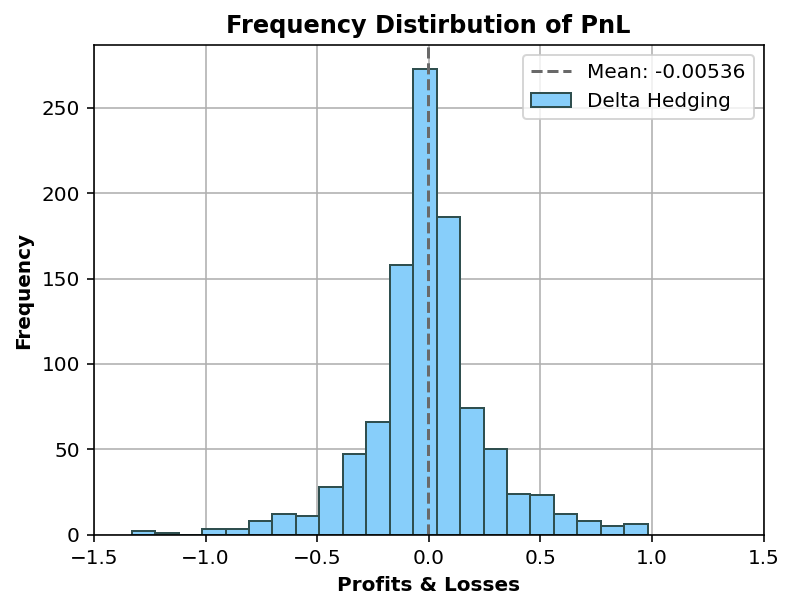

In [16]:
## Histrogram of profits
plt.figure(figsize=(6,4.5))
ax = plt.gca()
ax.grid()
ax.set_axisbelow(True)
ax.hist(PnL, bins=22, ec="darkslategrey", color="lightskyblue")
ax.axvline(np.mean(PnL), color="dimgrey" ,ls="dashed")
ax.set_xlim(-1.5, 1.5)
ax.set_xlabel("Profits & Losses", fontweight="bold")
ax.set_ylabel("Frequency", fontweight="bold")
ax.set_title("Frequency Distirbution of PnL", fontweight="bold")
ax.legend([("Mean: {}".format(round(np.mean(PnL), 5))), "Delta Hedging"])

We compute the sample mean for the simulated profit data and the 95% confidence interval for the population mean

In [17]:
## calculate sample mean
print("Sample mean:", np.mean(PnL))

## 95% confidence interval of population mean
CI_sample = [np.mean(PnL)-1.96*np.sqrt(np.var(PnL)/len(PnL)), np.mean(PnL)+1.96*np.sqrt(np.var(PnL)/len(PnL))]
print("95% Confidence Interval of sample mean:", CI_sample)

Sample mean: -0.005357854738382922
95% Confidence Interval of sample mean: [-0.022099230326901514, 0.011383520850135668]


We now show it is numerically show it is possible to replicate the call option by plotting the RMS error vs re-hedge and the log-log chart of this, where we find the RMS order of convergence to be aproximately  $\mathcal{O}(n^{\frac{1}{2}})$

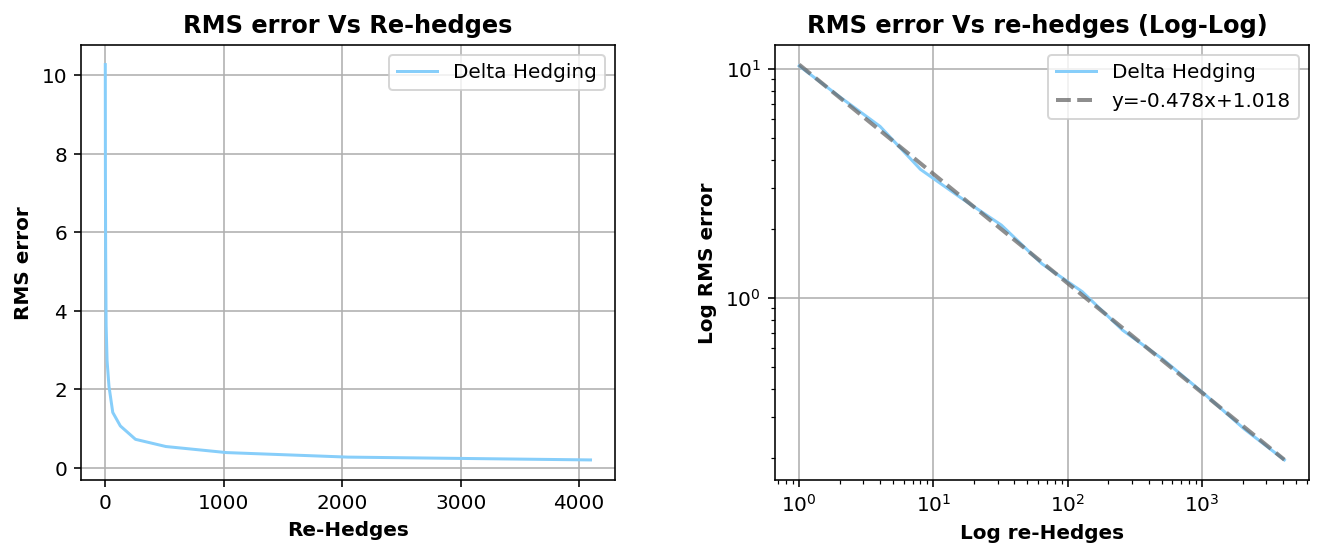

In [18]:
### Log-Log plot

### Comaprison of Delta And Gamma Hedging Plot

# plot settings
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(11)
plt.subplots_adjust(wspace=0.3)

# plotting points for plots 1 and 2
n_points = 13
n_steps = np.zeros(n_points)
rms_error = np.zeros(n_points)
for i in range(0,n_points):

    # steps
    n_steps[i] = 2**i

    # delta 
    S, Pi, error = simulate_delta_headging(market_model(), option(), 1000, int(n_steps[i]), "variable", "s2", "explicit", "C") 

    rms_error[i] = np.sqrt(np.mean(error**2))

# Plot 1
ax1.grid()
ax1.plot(n_steps, rms_error, color="lightskyblue")
ax1.set_xlabel("Re-Hedges", fontweight="bold")
ax1.set_ylabel("RMS error", fontweight="bold")
ax1.set_title("RMS error Vs Re-hedges", fontweight="bold")
ax1.legend(["Delta Hedging"])

# Line of best fit Log-Log (gamma)
coefficients = np.polyfit(np.log10(n_steps), np.log10(rms_error), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(n_steps)) 

# Plot 2
ax2.grid()
ax2.loglog(n_steps, rms_error, color="lightskyblue")
ax2.plot(n_steps, 10**log10_y_fit, color="dimgrey", alpha=0.75, linestyle="dashed", linewidth=2)
ax2.set_xlabel("Log re-Hedges", fontweight="bold")
ax2.set_ylabel("Log RMS error", fontweight="bold")
ax2.set_title("RMS error Vs re-hedges (Log-Log) ", fontweight="bold")
ax2.legend(["Delta Hedging", "y={}x+{}".format(round(coefficients[0], 3), round(coefficients[1], 3))])

We also compute the black-scholes price of the call option with strike price $K=139$, matruity $T=1.60$ at time 0  and inital stock price $S_0=105$

In [19]:
## Call Option Value at time 0
print("Price of call option at time 0:", BS_call(market_model(), option(), 105, 0, "s2"))

Price of call option at time 0: 2.4240933082154044


# Question 2

We simulate delta hedging of a single call option with strike price $K=139$, matruity $T=1.60$ for 1000 simulation and 1000 time steps between time 0 and $T/2=0.80$. The true underlying stock price proccess follows $dS_t = S_t\mu dt + S_t\sigma(t)dW_t$ where $\mu=0.12$ and $\sigma(t) = 0.13 + 0.13\Big(\frac{t-0.50}{T-0.50}\Big)$ if $t>0.50$ and $\sigma(t) = 0.13$ if $t \leq 0.50$. However in the delta hedging strategy we assume the stock price process is $dS_t = S_t\mu dt + S_t\sigma(T)dW_t$ where $\sigma(T) = 0.26$ and thus we uses $C^{\text{BS}}_t(S_t, K, T, \sigma(T), r)$ to calculate the value and delta of the call option being hedged.

In [20]:
## Simulate Delta Headge with ...
S, Pi, error = simulate_delta_headging(market_model(), option(), 1000, 2000, "variable", "fixed", "explicit", "C")

## PnL if Hedging strategy is liquidated at T/2
PnL = Pi[:, 1000] - BS_call(market_model(), option(), S[:, 1000], 0.5*1.6, "fixed")

We plot a histogram of the profit data produced by the monte-carlo simulation for a call option hedged using an incorrect volaility model assumption.

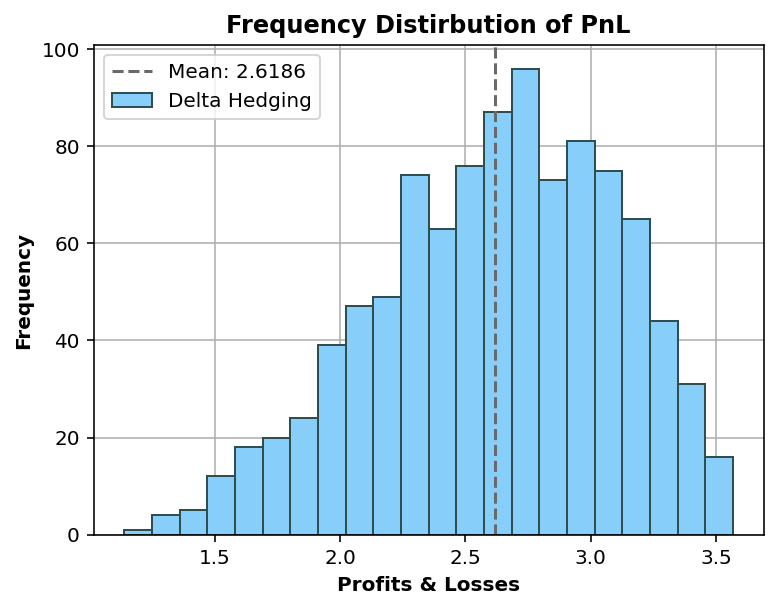

In [21]:
## Histrogram of profits
plt.figure(figsize=(6,4.5))
ax = plt.gca()
ax.grid()
ax.set_axisbelow(True)
ax.hist(PnL, bins=22, ec="darkslategrey", color="lightskyblue")
ax.axvline(np.mean(PnL), color="dimgrey" ,ls="dashed")
ax.set_xlabel('Profits & Losses', fontweight="bold")
ax.set_ylabel('Frequency', fontweight="bold")
ax.set_title("Frequency Distirbution of PnL", fontweight="bold")
ax.legend([("Mean: {}".format(round(np.mean(PnL), 5))), "Delta Hedging"])

We Compute the sample mean of the monte-carlo simulation profit data and the 95% confidence interval of the population mean

In [22]:
## Mean
print("Sample mean:", np.mean(PnL))

## 95% confidence interval
CI_sample = [np.mean(PnL)-1.96*np.sqrt(np.var(PnL)/len(PnL)), np.mean(PnL)+1.96*np.sqrt(np.var(PnL)/len(PnL))]
print("Confidence Interval of sample mean:", CI_sample)

Sample mean: 2.618598115732542
Confidence Interval of sample mean: [2.5888434393185933, 2.648352792146491]


We now show it is numerically show it is not possible to replicate the call option by plotting the RMS error vs re-hedge and a partnered log-log plot, were we do not find a convergence to zero

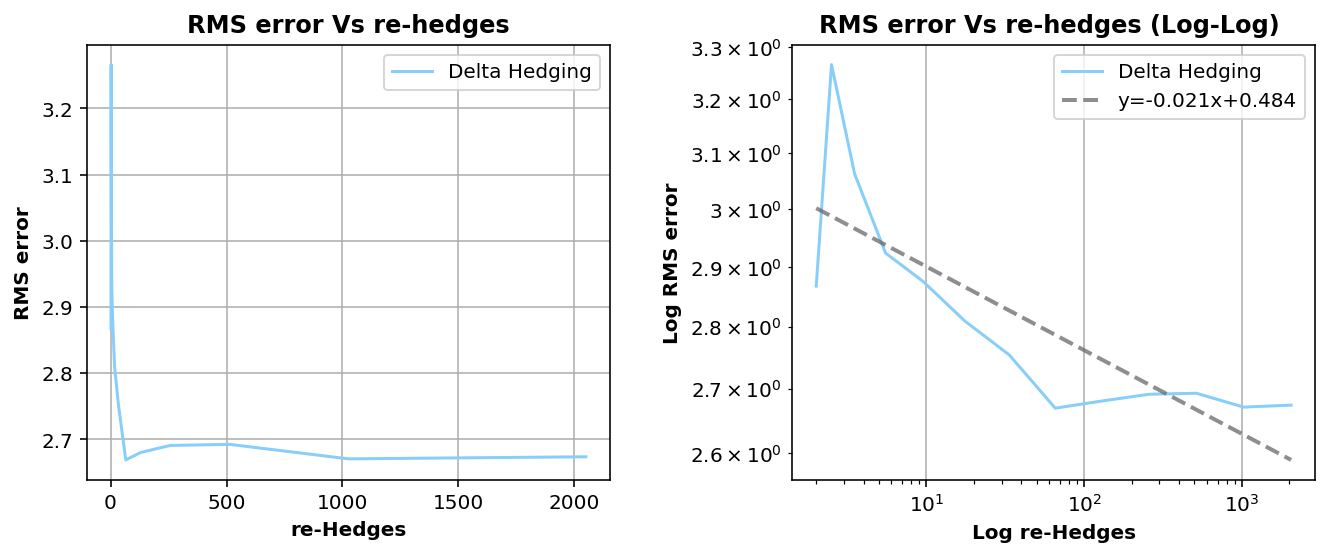

In [23]:
### Comaprison of Delta And Gamma Hedging Plot

# plot settings
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(11)
plt.subplots_adjust(wspace=0.35)

# plotting points for plots 1 and 2
n_points = 13
n_steps = np.zeros(n_points)
rms_error = np.zeros(n_points)
for i in range(0,n_points):

    # steps
    n_steps[i] = 2**i+3

    # delta 
    S, Pi, error = simulate_delta_headging(market_model(), option(), 1000, int(n_steps[i]), "variable", "fixed", "explicit", "C")
    error = Pi[:, int(n_steps[i]/2)] - BS_call(market_model(), option(), S[:, int(n_steps[i]/2)], 0.5*1.6, "fixed")

    rms_error[i] = np.sqrt(np.mean(error**2))

# Plot 1
ax1.grid()
ax1.plot(n_steps/2, rms_error, color="lightskyblue")
ax1.set_xlabel("re-Hedges", fontweight="bold")
ax1.set_ylabel("RMS error", fontweight="bold")
ax1.set_title("RMS error Vs re-hedges", fontweight="bold")
ax1.legend(["Delta Hedging"])

# Line of best fit Log-Log (gamma)
coefficients = np.polyfit(np.log10(n_steps/2), np.log10(rms_error), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(n_steps/2)) 

# Plot 2
ax2.grid()
ax2.loglog(n_steps/2, rms_error, color='lightskyblue')
ax2.plot(n_steps/2, 10**log10_y_fit, color="dimgrey", alpha=0.75, linestyle="dashed", linewidth=2)
ax2.set_xlabel("Log re-Hedges", fontweight="bold")
ax2.set_ylabel("Log RMS error", fontweight="bold")
ax2.set_title("RMS error Vs re-hedges (Log-Log) ", fontweight="bold")
ax2.legend(["Delta Hedging", "y={}x+{}".format(round(coefficients[0], 3), round(coefficients[1], 3))])


# Question 3

We simulate delta hedging for a call option with strike price $K=139$, matruity $T=1.60$ for 1000 simulation and 1000 time steps between time 0 and $T/2=0.80$. The true underlying stock price proccess follows $dS_t = S_t\mu dt + S_t\sigma(T)dW_t$ where $\mu=0.12$ and $\sigma(T) = 0.26$. When delta hedging we assumed the stock price process is $dS_t = S_t\mu dt + S_t\sigma(T)dW_t$ and thus we uses $C^{\text{BS}}_t(S_t, K, T, \sigma(T), r)$ when calculating the delta, gamma and price of the call option.

We also add an extra two simulations for comparison of delta and gamma hedging. These simulations simulate the respective hedging strategy for 1000 simulations between time 0 and $T/2=0.80$. The set up of the true and assumed unerlying GBM procces is the same as above. analsysis 

In [24]:
## Simulate half Delta, Gamma hedge strategy (main)
S, Pi, PnL = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, 2000, "fixed", "fixed", "explicit", "C")

## Simulate Delta Hedge stratgey (extra)
S_alt, Pi_alt, error = simulate_delta_headging(market_model(), option(), 1000, 2000, "fixed", "fixed", "explicit", "C")

## PnL if Hedging strategy (extra) is liquidated at T/2
PnL_alt = Pi_alt[:, 1000] - BS_call(market_model(), option(), S_alt[:, 1000], 0.5*1.6, "fixed")

## Simulate half Delta, Gamma hedge strategy (extra)
S_alt2, Pi_alt2, PnL_alt2 = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, 100, "fixed", "fixed", "explicit", "C")

We plot a histogram of the profit data produced by the monte-carlo simulation of Gamma hedging 

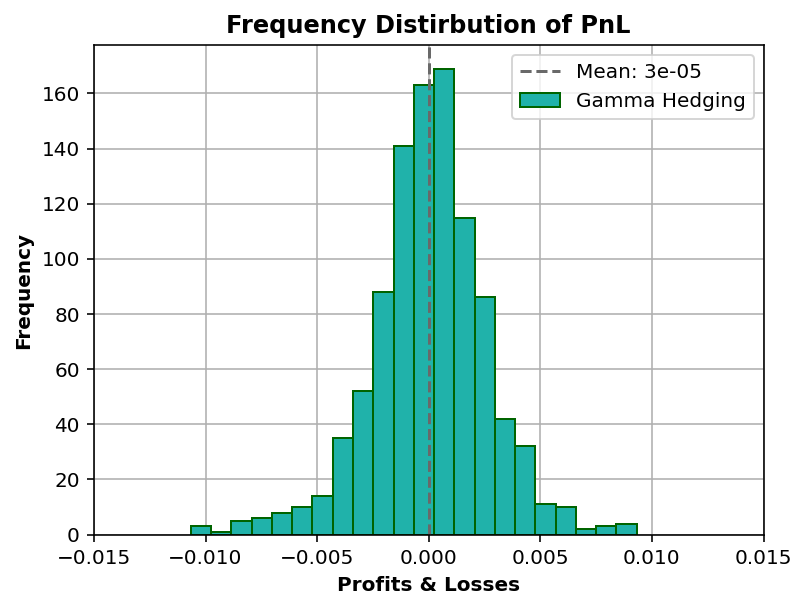

In [25]:
## Histogram of the profits
plt.figure(figsize=(6,4.5))
ax = plt.gca()
ax.grid()
ax.set_axisbelow(True)
ax.hist(PnL, bins=22,  ec="darkgreen", color="lightseagreen")
ax.axvline(np.mean(PnL), color="dimgrey" ,ls="dashed")
ax.set_xlim([-0.015, 0.015])
ax.set_xlabel('Profits & Losses', fontweight="bold")
ax.set_ylabel('Frequency', fontweight="bold")
ax.set_title("Frequency Distirbution of PnL", fontweight="bold")
ax.legend([("Mean: {}".format(round(np.mean(PnL), 5))), "Gamma Hedging"])

We compute the sample mean of the monte-carlo simulation profit data and the 95% confidence interval of the population mean

In [26]:
## Mean
print("Sample mean:", np.mean(PnL))

## 95% confidence interval
CI_sample = [np.mean(PnL)-1.96*np.sqrt(np.var(PnL)/len(PnL)), np.mean(PnL)+1.96*np.sqrt(np.var(PnL)/len(PnL))]
print("Confidence Interval of sample mean:", CI_sample)

Sample mean: 3.033986826971866e-05
Confidence Interval of sample mean: [-0.00013144177947437222, 0.00019212151601380952]


We now show it is numerically show it is not possible to replicate the call option by plotting the RMS error vs re-hedge and a partnered log-log plot. We also find the and finding the RMS order of convergence to be aproximately  $\mathcal{O}(n^{-1})$

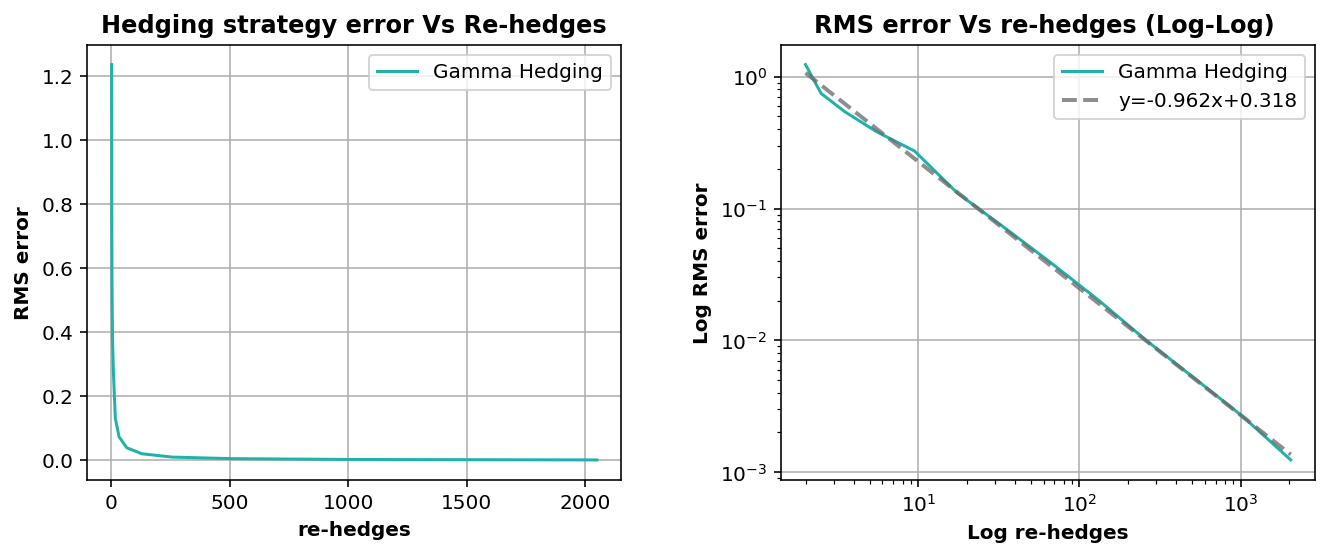

In [27]:
### Comaprison of Delta And Gamma Hedging Plot

# plot settings
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(11)
plt.subplots_adjust(wspace=0.3)

# plotting points for plots 1 and 2
n_points = 13
n_steps = np.zeros(n_points)
rms_error = np.zeros(n_points)
for i in range(0,n_points):

    # steps
    n_steps[i] = 2**i+3

    # Gamma
    S, Pi, error = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, int(n_steps[i]), "fixed", "fixed", "explicit", "C")

    rms_error[i] = np.sqrt(np.mean(error**2))

# Plot 1
ax1.grid()
ax1.plot(n_steps/2, rms_error, color="lightseagreen")
ax1.set_xlabel('re-hedges', fontweight="bold")
ax1.set_ylabel('RMS error', fontweight="bold")
ax1.set_title('Hedging strategy error Vs Re-hedges', fontweight="bold")
ax1.legend(["Gamma Hedging"])

# Line of best fit Log-Log (gamma)
coefficients = np.polyfit(np.log10(n_steps/2), np.log10(rms_error), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(n_steps/2)) 

# Plot 2
ax2.grid()
ax2.loglog(n_steps/2, rms_error, color='lightseagreen')
ax2.plot(n_steps/2, 10**log10_y_fit, color="dimgray", alpha=0.75, linestyle="dashed", linewidth=2)
ax2.set_xlabel("Log re-hedges", fontweight="bold")
ax2.set_ylabel("Log RMS error", fontweight="bold")
ax2.set_title("RMS error Vs re-hedges (Log-Log) ", fontweight="bold")
ax2.legend(["Gamma Hedging", "y={}x+{}".format(round(coefficients[0], 3), round(coefficients[1], 3))])


We compare Delta and gamma hedging through graphical means of the following three plots produced. Plot 1 is a side-by-side histogram of delta hedging from 0 to $T/2$ with 1000 steps amd gamma hedging from 0 to $T/2$ with 50 steps. Plot 2 shows the evolution of root mean squared error as the number of steps is increased. Plot 3 shows the log-log plot of the root mean squared errors as the number of steps is increased.

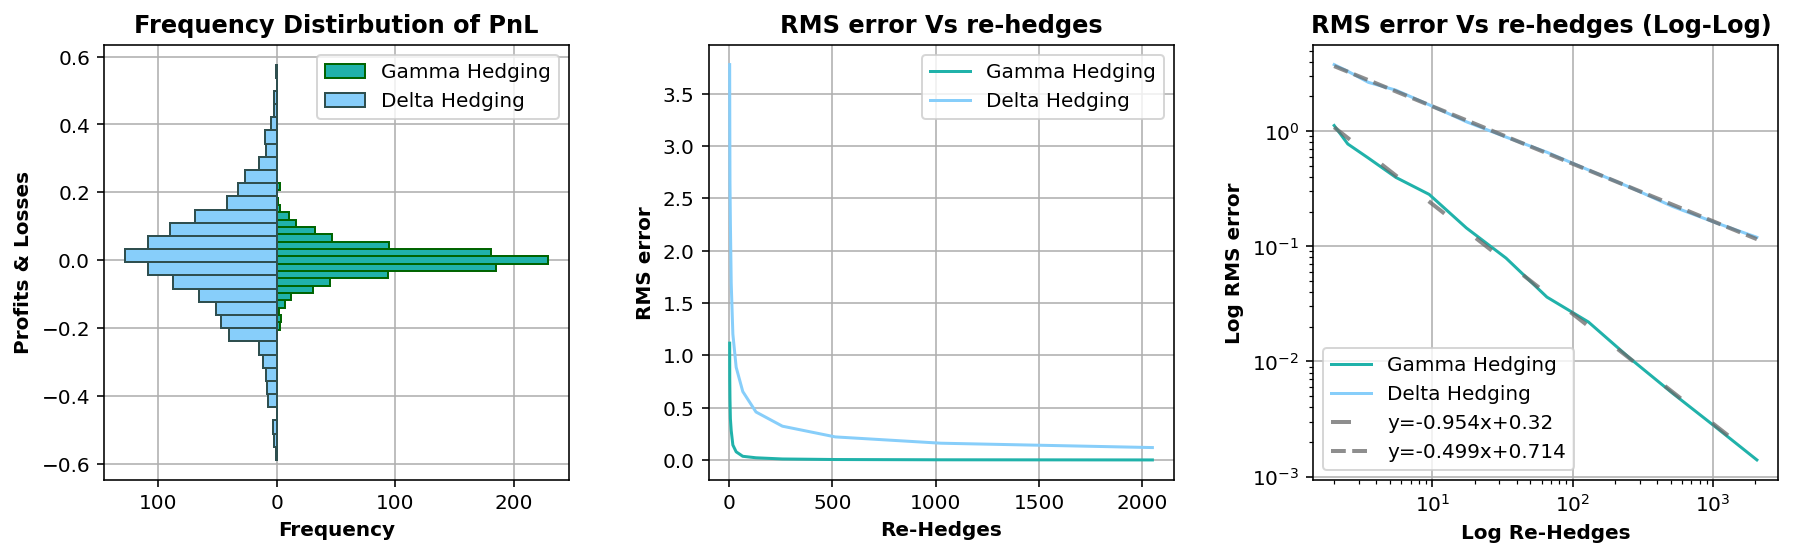

In [28]:
### Comaprison of Delta And Gamma Hedging Plot

# ignore warnings
warnings.filterwarnings("ignore")

# plot settings
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(15)
plt.subplots_adjust(wspace=0.3)

# Plot 5,1 alternative
#ax1.grid()
#ax1.set_axisbelow(True)
#ax1.hist(PnL_alt, density=False, bins=20, ec="darkslategrey", color="lightskyblue", alpha=0.75)
#ax1.hist(PnL_alt2, density=False, bins=20, ec="darkgreen", color="lightseagreen", alpha=0.75)
#ax1.set_xlim([-0.8, 0.8])
#ax1.set_xlabel('Profits & Losses')
#ax1.set_ylabel('Frequency')
#ax1.legend(["Delta: 1000 Steps", "Gamma: 50 Steps"])

#   Plotting point for plot 1
heights, bins = np.histogram(PnL_alt, density=False, bins=30)
heights = heights * -1
bin_width = np.diff(bins)
bin_pos = (bins[:-1] + bin_width / 2) * -1

# Plot (5,1)
ax1.grid()
ax1.set_axisbelow(True)
sns.histplot(y=PnL_alt2, bins=20, edgecolor="darkgreen", color="lightseagreen", alpha=1, ax=ax1)
ax1.barh(y=bin_pos, height=bin_width, width=heights, edgecolor="darkslategrey", color="lightskyblue")
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[1] = "100"
ax1.set_xticklabels(labels)
ax1.set_xlabel('Frequency', fontweight="bold")
ax1.set_ylabel('Profits & Losses', fontweight="bold")
ax1.set_title("Frequency Distirbution of PnL", fontweight="bold")
ax1.legend(["Gamma Hedging", "Delta Hedging"])

# plotting points for plots (5,2) and (5,3)
n_points = 13
n_steps = np.zeros(n_points)
rms_error1 = np.zeros(n_points)
rms_error2 = np.zeros(n_points)
for i in range(0,n_points):

    # steps
    n_steps[i] = 2**i+3

    # Gamma
    S, Pi, error1 = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, int(n_steps[i]), "fixed", "fixed", "euler", "C")

    ## delta
    S, Pi, error = simulate_delta_headging(market_model(), option(), 1000, int(n_steps[i]), "fixed", "fixed", "explicit", "C")
    error2 = Pi[:, int(n_steps[i]/2)] - BS_call(market_model(), option(), S[:, int(n_steps[i]/2)], 0.5*1.6, "fixed")

    #rms error
    rms_error1[i] = np.sqrt(np.mean(error1**2))
    rms_error2[i] = np.sqrt(np.mean(error2**2))

# Plot (5,2)
ax2.grid()
ax2.plot(n_steps/2, rms_error1, color="lightseagreen")
ax2.plot( n_steps/2, rms_error2, color="lightskyblue")
ax2.set_xlabel("Re-Hedges", fontweight="bold")
ax2.set_ylabel("RMS error", fontweight="bold")
ax2.set_title("RMS error Vs re-hedges", fontweight="bold")
ax2.legend(["Gamma Hedging", "Delta Hedging"])

# Line of best fit Log-Log (gamma)
coefficients1 = np.polyfit(np.log10(n_steps/2), np.log10(rms_error1), 1)
polynomial1 = np.poly1d(coefficients1)
log10_y1_fit = polynomial1(np.log10(n_steps/2)) 

# Line of best fit Log-Log (delta)
coefficients2 = np.polyfit(np.log10(n_steps/2), np.log10(rms_error2), 1)
polynomial2 = np.poly1d(coefficients2)
log10_y2_fit = polynomial2(np.log10(n_steps/2)) 

# Plot (5,3)
ax3.grid()
ax3.loglog(n_steps/2, rms_error1, color='lightseagreen')
ax3.loglog(n_steps/2, rms_error2, color="lightskyblue")
ax3.plot(n_steps/2, 10**log10_y1_fit, color="dimgrey", alpha=0.75, linestyle=(0, (5, 10)), linewidth=2)
ax3.plot(n_steps/2, 10**log10_y2_fit, color="dimgrey", alpha=0.75, linestyle="dashed", linewidth=2)
ax3.set_xlabel("Log Re-Hedges", fontweight="bold")
ax3.set_ylabel("Log RMS error", fontweight="bold")
ax3.set_title("RMS error Vs re-hedges (Log-Log) ", fontweight="bold")
ax3.legend(["Gamma Hedging", "Delta Hedging", "y={}x+{}".format(round(coefficients1[0], 3), round(coefficients1[1], 3)), "y={}x+{}".format(round(coefficients2[0], 3), round(coefficients2[1], 3)),])

# reset warnings
warnings.resetwarnings()

# Question 4

We simulate delta hedging for a call option with strike price $K=139$, matruity $T=1.60$ for 1000 simulation and 1000 time steps between time 0 and $T/2=0.80$. The true underlying stock price proccess follows $dS_t = S_t\mu dt + S_t\sigma(T)dW_t$ where $\mu=0.12$ and $\sigma(T) = 0.26$. When delta hedging is performed we assumed the stock price process is $dS_t = S_t\mu dt + S_t\sigma(t)dW_t$ where $\sigma(t) = 0.13 + 0.13\Big(\frac{t-0.50}{T-0.50}\Big)$ if $t>0.50$ and thus we uses $C^{\text{BS}}_t(S_t, K, T, s(t), r)$ where $s(t) = \frac{1}{T-t}\int_t^T{\sigma(s)}ds$ when calculating the delta, gamma and price of the call option.

In [29]:
## Simulate Delta, Gamma Headge with ...
S, Pi, PnL = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, 2000, "variable", "fixed", "explicit", "C")

We plot the histogram of the profit data produced by the monte-carlo simulation for gamma hedging with a incorrect volatility assumption

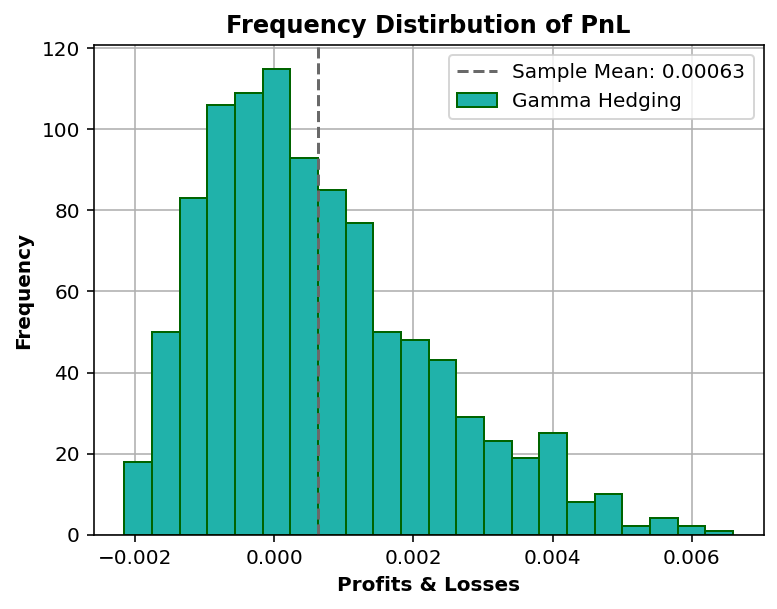

In [30]:
## Histrogram of errors
plt.figure(figsize=(6,4.5))
ax = plt.gca()
ax.grid()
ax.set_axisbelow(True)
ax.hist(PnL, bins=22, ec="darkgreen", color="lightseagreen", density=False)
ax.axvline(np.mean(PnL), color="dimgrey" ,ls="dashed")
ax.set_xlabel('Profits & Losses', fontweight="bold")
ax.set_ylabel('Frequency', fontweight="bold")
ax.set_title("Frequency Distirbution of PnL", fontweight="bold")
ax.legend([("Sample Mean: {}".format(round(np.mean(PnL), 5))), "Gamma Hedging"])

We compute the sample mean of the profit data and the 95% confidence interval of the population mean.

In [31]:
## Mean
print("Sample mean:", np.mean(PnL))

## 95% confidence interval
CI_sample = [np.mean(PnL)-1.96*np.sqrt(np.var(PnL)/len(PnL)), np.mean(PnL)+1.96*np.sqrt(np.var(PnL)/len(PnL))]
print("Confidence Interval of sample mean:", CI_sample)

Sample mean: 0.00062745145723028
Confidence Interval of sample mean: [0.0005286760564662733, 0.0007262268579942867]


We now show it is numerically show it is possible to replicate the call option by plotting the RMS error vs re-hedge and a partnered log-log plot and finding the RMS order of convergence to be aproximately  $\mathcal{O}(n^{-1})$

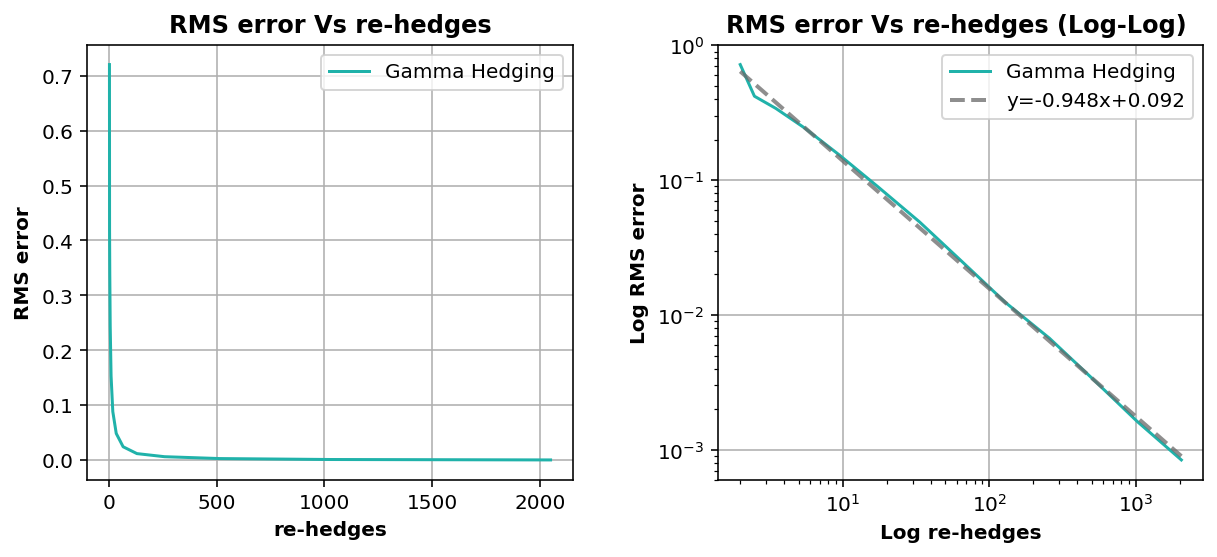

In [32]:
### Comaprison of Delta And Gamma Hedging Plot

# plot settings
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
plt.subplots_adjust(wspace=0.3)

# plotting points for plots 1 and 2
n_points = 13
n_steps = np.zeros(n_points)
rms_error = np.zeros(n_points)
for i in range(0,n_points):

    # steps
    n_steps[i] = 2**i+3

    # Gamma
    S, Pi, error = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, int(n_steps[i]), "variable", "fixed", "explicit", "C")

    rms_error[i] = np.sqrt(np.mean(error**2))

# Plot 1
ax1.grid()
ax1.plot(n_steps/2, rms_error, color="lightseagreen")
ax1.set_xlabel("re-hedges", fontweight="bold")
ax1.set_ylabel("RMS error", fontweight="bold")
ax1.set_title("RMS error Vs re-hedges", fontweight="bold")
ax1.legend(["Gamma Hedging"])

# Line of best fit Log-Log (gamma)
coefficients = np.polyfit(np.log10(n_steps/2), np.log10(rms_error), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(n_steps/2)) 

# Plot 2
ax2.grid()
ax2.loglog(n_steps/2, rms_error, color="lightseagreen")
ax2.plot(n_steps/2, 10**log10_y_fit, color="dimgrey", alpha=0.75, linestyle="dashed", linewidth=2)
ax2.set_xlabel("Log re-hedges", fontweight="bold")
ax2.set_ylabel("Log RMS error", fontweight="bold")
ax2.set_title("RMS error Vs re-hedges (Log-Log) ", fontweight="bold")
ax2.legend(["Gamma Hedging", "y={}x+{}".format(round(coefficients[0], 3), round(coefficients[1], 3))])

<h2><center>Extra</center></h2>

### Quick Checks

This is a quick check that the Confidence intervals are valid by comparing a boatstraping methods to that of the Central Limit Theorm method used

In [33]:
### Boatstrap method Vs CLT method

## A check that the CI produced by the CLT is valid

# simulate PnL
S, Pi, PnL = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, 1000, "variable", "fixed", "explicit", "C")

## 95% confidence interval (boot strap)
bootstrap_means = []
for i in range(100000):
    sample_PnL = np.random.choice(PnL, 1000, replace=True)
    bootstrap_means.append(np.mean(sample_PnL))
dirac = np.mean(bootstrap_means) - bootstrap_means
percentiles = np.percentile(dirac, [2.5, 97.5])
print("Boatstrap CI")
print([np.mean(bootstrap_means)-percentiles[1], np.mean(bootstrap_means)-percentiles[0]])

## 95% confidence interval (CLT)
CI_sample = [np.mean(PnL)-1.96*np.sqrt(np.var(PnL)/len(PnL)), np.mean(PnL)+1.96*np.sqrt(np.var(PnL)/len(PnL))]
print("CLT CI")
print(CI_sample)

Boatstrap CI
[0.0010547451532207678, 0.0014407121970840524]
CLT CI
[0.0010543513870328127, 0.0014402169501554524]


### Extra Graphs

This extra graph is a log-log plot of the RMS errors Vs re-hedging for a half period hedge of Cases 1, 2, 3 and 4

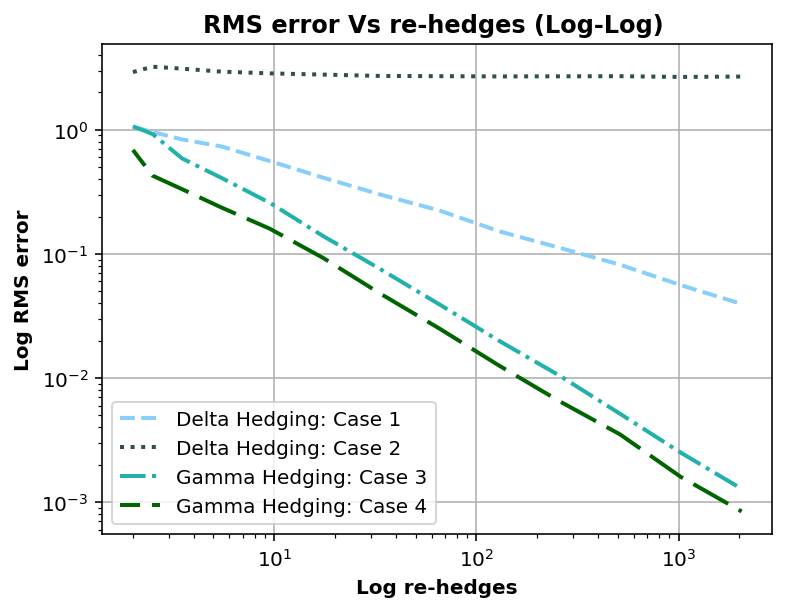

In [34]:
# Plotting extra graph

plt.figure(figsize=(6,4.5))
ax = plt.gca()
ax.grid()

n_points = 13
n_steps = np.zeros(n_points)
rms_error1 = np.zeros(n_points)
rms_error2 = np.zeros(n_points)
rms_error3 = np.zeros(n_points)
rms_error4 = np.zeros(n_points)
for i in range(0,n_points):

    # steps
    n_steps[i] = 2**i+3

    # case 1 delta hedging
    S, Pi, error1 = simulate_delta_headging(market_model(), option(), 1000, int(n_steps[i]), "variable", "s2", "euler", "C") 
    error1 = Pi[:, int(n_steps[i]/2)] - BS_call(market_model(), option(), S[:, int(n_steps[i]/2)], 0.5*1.6, "s2")

    # case 2 delta hedging
    S, Pi, error2 = simulate_delta_headging(market_model(), option(), 1000, int(n_steps[i]), "variable", "fixed", "explicit", "C")
    error2 = Pi[:, int(n_steps[i]/2)] - BS_call(market_model(), option(), S[:, int(n_steps[i]/2)], 0.5*1.6, "fixed")

    # case 3 gamma hedging
    S, Pi, error3 = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, int(n_steps[i]), "fixed", "fixed", "explicit", "C")

    # case 4 gamma hedging
    S, Pi, error4 = half_simulate_gamma_delta_headging(market_model(), option(), option_H(), 1000, int(n_steps[i]), "variable", "fixed", "explicit", "C")

    # rms error
    rms_error1[i] = np.sqrt(np.mean(error1**2))
    rms_error2[i] = np.sqrt(np.mean(error2**2))
    rms_error3[i] = np.sqrt(np.mean(error3**2))
    rms_error4[i] = np.sqrt(np.mean(error4**2))

# plots case 1
ax.loglog(n_steps/2, rms_error1, color="lightskyblue", linestyle="dashed", linewidth=2)
# plot case 2
ax.loglog(n_steps/2, rms_error2, color="darkslategrey", linestyle="dotted", linewidth=2)
# plot case 3
ax.loglog(n_steps/2, rms_error3, color="lightseagreen", linestyle="dashdot", linewidth=2)
# plot case 4
ax.loglog(n_steps/2, rms_error4, color="darkgreen", linestyle=(5, (10, 3)), linewidth=2)
# plot labels
ax.set_xlabel("Log re-hedges", fontweight="bold")
ax.set_ylabel("Log RMS error", fontweight="bold")
ax.set_title("RMS error Vs re-hedges (Log-Log) ", fontweight="bold")
ax.legend(["Delta Hedging: Case 1", "Delta Hedging: Case 2", "Gamma Hedging: Case 3", "Gamma Hedging: Case 4"])